**Описание проекта**  
**Задача**   
«Метанпромбанк» сделал нам заказ на аналитику данных с целью сегментации клиентов банка. Для этого проанализируем клиентов банка и сегментируем пользователей по количеству потребляемых продуктов, обращая особое внимание на отток. Сегментация покажет, как клиенты пользуются услугами банка.

***1.	Загрузим данные***  
Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.  
Колонки:  
•	userid — идентификатор пользователя,  
•	score — баллы кредитного скоринга,  
•	City — город,  
•	Gender — пол,  
•	Age — возраст,  
•	Objects — количество объектов в собственности,  
•	Balance — баланс на счёте,  
•	Products — количество продуктов, которыми пользуется клиент,  
•	CreditCard — есть ли кредитная карта,  
•	Loyalty — активный клиент,  
•	estimated_salary — заработная плата клиента,  
•	Churn — ушёл или нет.  

***2.	Проведём исследовательский анализ данных***  
•	Посмотрим на датасет: есть ли в нём отсутствующие значения (пропуски). Если пропуски есть попробуем объяснить причину их появления;  
•	При необходимости поменяем названия столбцов,приведём к нижнему регистру;

EDA:  
•	Рассмотрим какие признаки у нас есть, как они распределились;  
•	Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался;  
•	Построим столбчатые гистограммы по признакам разделяя по двум группам (отток, остались);  
•	Построим матрицу корреляции  

***3.	Сегментируем пользователей на основе данных о количестве потребляемых продуктов***  
•	Посмотрим количество сегментов и изучим как по ним распределились клиенты;  
•	Узнаем сколько клиентов ушло и сколько осталось в каждом сегменте;  
•	Если посчитаем нужным, можно объединить сегменты, разделить или удалить. 

***4.	Гипотезы.***  
•	Проверим первую гипотезу  различия дохода между теми клиентами, которые пользуются; двумя продуктами банка, и теми, которые пользуются одним;  
•	Сформулируем и проверим вторую статистическую гипотезу относительно представленных данных.

***5.	Дашборт***  
•	Для создания дашборта используем исходные данные;  
• Построим диаграмму, отображающую распределение заработной платы клиентов;  
• Добавим индикатор, отображающий процент клиентов, имеющих кредитную карту;  
• Добавим фильтр дашборда, позволяющий выбрать ушёл клиент или нет.

***6.	Презентация***  
•	Подготовим презентацию с подробным отчетом в формате pdf. Отразим основные результаты, выводы и рекомендации.

***7.	Вывод***  
•	На основании нашего исследования сформулируем основные выводы и рекомендации для стратегии взаимодействия с клиентами и их удержания;  
•	Сюда же приложим ссылки на презентацию и дашборт. 


## 1.Загрузим данные

In [1]:
# Импорт библиотек
import pandas as pd
import math as mth
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps

#визуализация
import seaborn as sns; sns.set()

data = pd.read_csv('/datasets/bank_dataset.csv')
data.head(5)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


## 2. Предобработка

In [2]:
# смотрим пропуски
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [3]:
print(data['Balance'].isnull().sum())
print('В столбце Balance {} % пропусков'. format(data['Balance'].isnull().sum()/len(data)*100))

3617
В столбце Balance 36.17 % пропусков


In [4]:
# Приведём к нижнему регистру названия столбцов
data.columns = [col.lower() for col in data.columns]
# Немного откорректируем названия 
data = data.rename(columns = {'userid':'user_id','creditcard':'credit_card'})
data.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

In [5]:
# Проверим на дубликаты
data.duplicated().sum()

0

**Итоги по предобработке:**  
•	Пропуски только в столбце Balance (баланс на счёте) - 3617.  
•	Дубликаты отсутствуют  
•	Названия столбцов приведены в корректный вид .  

В столбце Balance 36,17% пропусков, игнорировать и удалить такое большое количество пропусков мы не можем. Для дальнейшей работы нам придётся выяснить их причину.


### Cтолбце "balance"

Исследуем пропуски в разрезе по количеству продуктов и оттоку. 

In [6]:
data.groupby('products')['balance'].apply(lambda x :x.isna().sum())

products
1     905
2    2600
3      98
4      14
Name: balance, dtype: int64

Больше всего пропусков в группе клиентов с 2 продуктами

In [7]:
data.groupby('churn')['balance'].apply(lambda x :x.isna().sum())

churn
0    3117
1     500
Name: balance, dtype: int64

Больше всего пропусков среди ушедших клиентов

In [8]:
data.groupby('city')['balance'].apply(lambda x :x.isna().sum())

city
Ростов Великий       0
Рыбинск           1199
Ярославль         2418
Name: balance, dtype: int64

In [9]:
data['city'].value_counts()

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

Здесь получается, что пропуски имеет почти половина данных о балансе клиентов из города Ярославль(48.2%) и Рыбинск (48.4%) . Данные по балансу из Ростова без пропусков совсем.

In [10]:
data.groupby('gender')['balance'].apply(lambda x :x.isna().sum())

gender
Ж    1654
М    1963
Name: balance, dtype: int64

In [11]:
data.groupby('loyalty')['balance'].apply(lambda x :x.isna().sum())

loyalty
0    1744
1    1873
Name: balance, dtype: int64

In [12]:
data.groupby('credit_card')['balance'].apply(lambda x :x.isna().sum())

credit_card
0    1025
1    2592
Name: balance, dtype: int64

Отсюда мы можем сделать предположения о том, что пропуски в балансе имеют те клиенты, которые пользуются или пользовались продуктами не требующие открытия дебетового счёта. Так же мы видим, что много пропусков среди тех, кто прекратил сотрудничество с банком.Ещё можем предположить, что на момент выгрузки у какого то количества клиентов просто не было средств на счету.
Также обнаружили, что данные по гроду Ярославль имеет 48.2% пропусков, Рыбинск- 48.4% . Данные по балансу из Ростова без пропусков совсем.Тут мы можем выдвинуть ещё одну вероятную причину пропусков: либо принцип сбора данных в Ростове кардинально отличается от других городов, либо выгрузка из Ярославля и Рыбинска была не корректна. 

Заменять пропуски на среднее или медиану не буду, чтоб не исказить дальнейшее исследование, слишком большой процент. Заменю на 0 

In [13]:
data.fillna(0)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,0.00,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,0.00,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,0.00,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


## Проведём исследовательский анализ данных (EDA)

### Рассмотрим какие признаки у нас есть, как они распределились

In [14]:
data.drop(['user_id'], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
score,10000.0,650.528800,96.653299,350.00,584.000,652.000,718.0000,850.00
age,10000.0,38.921800,10.487806,18.00,32.000,37.000,44.0000,92.00
objects,10000.0,5.012800,2.892174,0.00,3.000,5.000,7.0000,10.00
balance,6383.0,119827.493793,30095.056462,3768.69,100181.975,119839.690,139512.2900,250898.09
products,10000.0,1.530200,0.581654,1.00,1.000,1.000,2.0000,4.00
credit_card,10000.0,0.705500,0.455840,0.00,0.000,1.000,1.0000,1.00
loyalty,10000.0,0.515100,0.499797,0.00,0.000,1.000,1.0000,1.00
estimated_salary,10000.0,100090.239881,57510.492818,11.58,51002.110,100193.915,149388.2475,199992.48
churn,10000.0,0.203700,0.402769,0.00,0.000,0.000,0.0000,1.00


###  Построим столбчатые гистограммы по признакам разделяя по двум группам (отток, остались)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


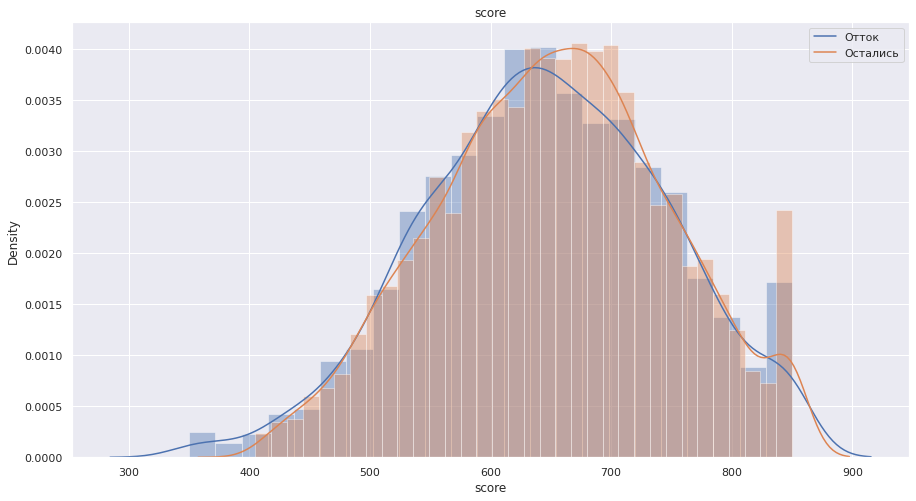

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


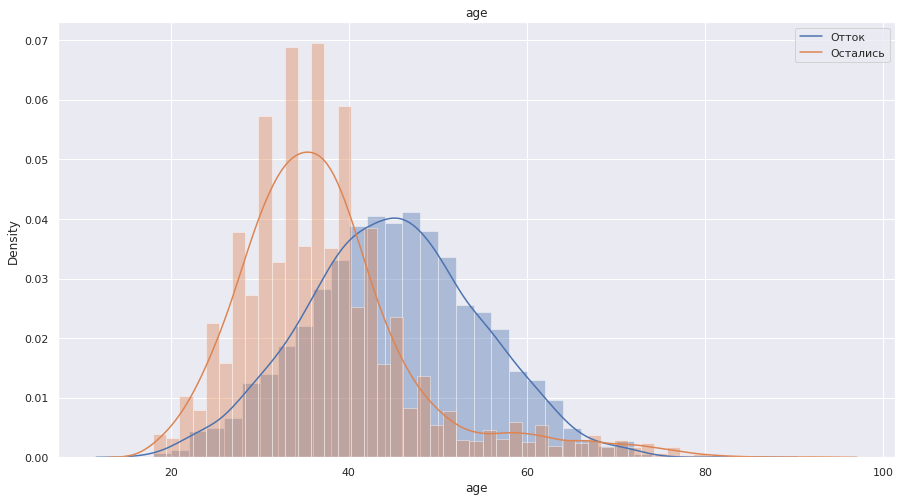

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


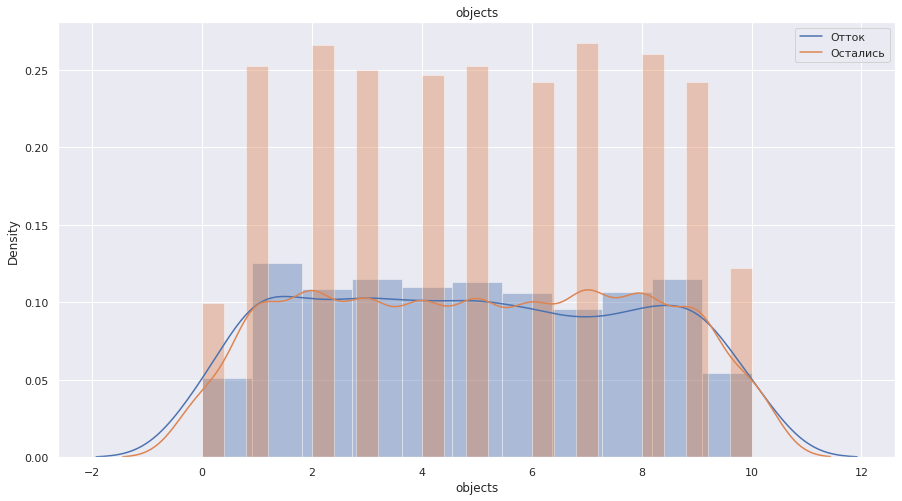

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


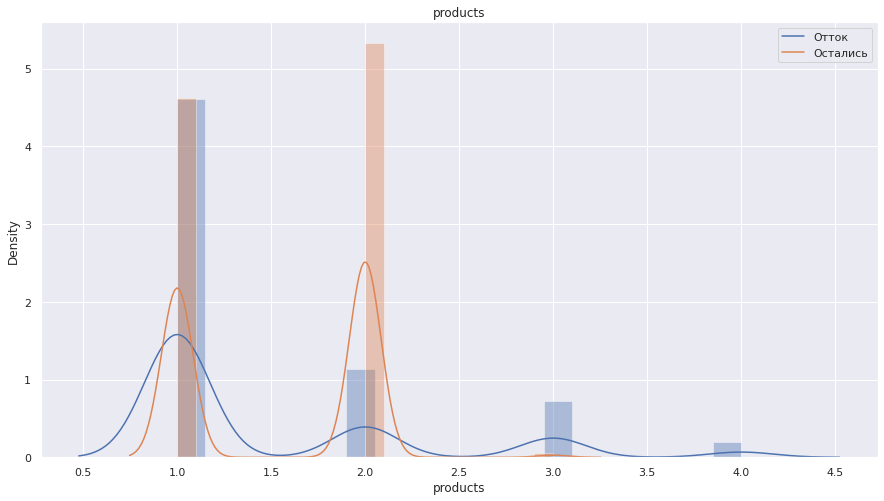

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


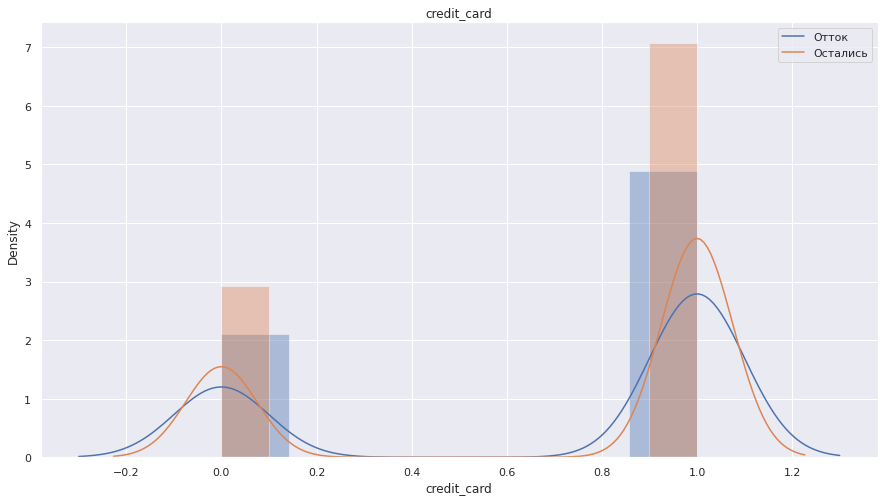

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


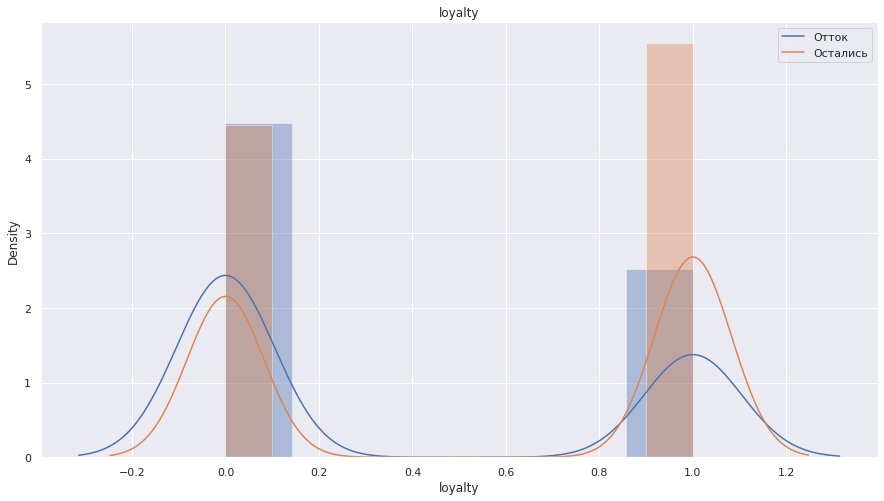

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


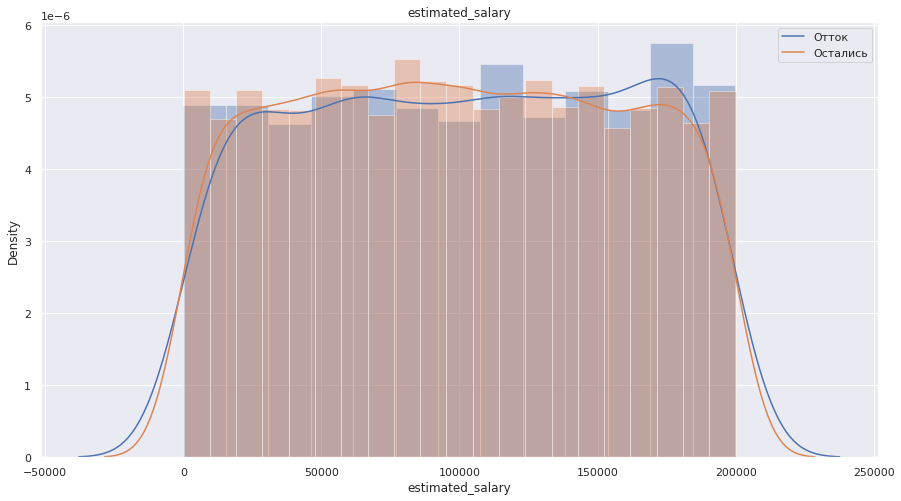

In [15]:

gone = data[data['churn']== 1]
remained = data[data['churn']== 0]
distplot_columns = ['score', 'age', 
                    'objects', 'products', 
                    'credit_card', 'loyalty','estimated_salary']
for column in distplot_columns: 
    plt.figure(figsize=(15,8)) 
    plt.title(column)
    sns.distplot(gone[column])
    sns.distplot(remained[column])
    plt.legend(['Отток', 'Остались'])
    plt.show()

### Распределение признака

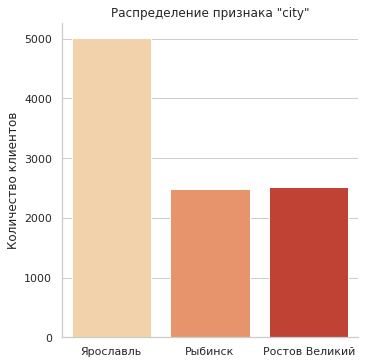

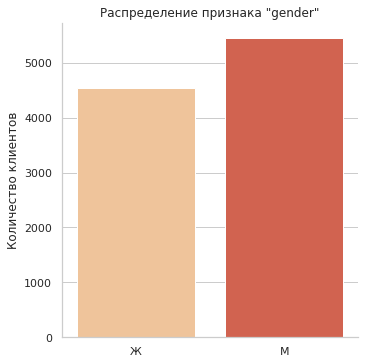

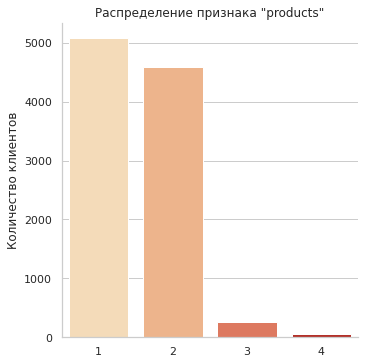

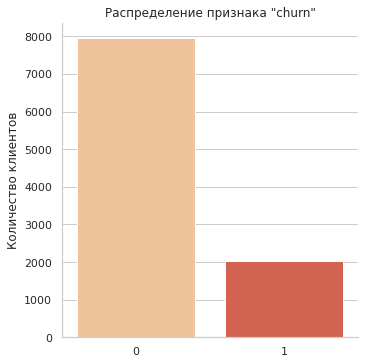

In [16]:
columns_name = dict(zip(data.columns,data))
df_cat = data[['city', 'gender', 'products', 'churn']]
with sns.axes_style("whitegrid"):
    for col in df_cat.columns:
        sns.catplot(x=col, kind='count', palette="OrRd", data=data)
        plt.title(f'Распределение признака "{columns_name[col]}"')
        plt.xlabel('')
        plt.ylabel('Количество клиентов')
        plt.grid(True, axis='y')
        plt.show()

In [17]:
data.drop(['user_id'], axis=1).groupby('churn').agg(['count','mean']).T

churn                               0              1
score            count    7963.000000    2037.000000
                 mean      651.853196     645.351497
age              count    7963.000000    2037.000000
                 mean       37.408389      44.837997
objects          count    7963.000000    2037.000000
                 mean        5.033279       4.932744
balance          count    4846.000000    1537.000000
                 mean   119535.864270  120746.971132
products         count    7963.000000    2037.000000
                 mean        1.544267       1.475209
credit_card      count    7963.000000    2037.000000
                 mean        0.707146       0.699067
loyalty          count    7963.000000    2037.000000
                 mean        0.554565       0.360825
estimated_salary count    7963.000000    2037.000000
                 mean    99738.391772  101465.677531

Итог по исследовательскому анализу данных:   
•	score ( баллы кредитного скоринга)- данный признак распределён почти без особой разницы в двух группах(отток, остались)  
•	city (город)- больше всего наших клиентов находятся в Ярославле,на половину в Рыбенске и Ростове(разница между ними не большая)
•	gender (пол)- здесь мужчин немного больше чем женщин  
•	age (возраст) -средний возраст 39 лет, активный отток наблюдается среди клиентов кому немного за 40,  
•	objects (количество объектов в собственности) – в среднем у наши клиенты имеют по 5 объектов собственности. Разница между теми, кто ушёл и остался незначительная   
•	products (количество продуктов, которыми пользуется клиент) – основная масса наших клиентов пользуется 1 или 2 продуктами банка  
•	credit_card (есть ли кредитная карта) – 70% наших клиентов обладатели наших кредитных карт, здесь тоже нет собой разницы между ушедшими и оставшимся   
•	loyalty (активный клиент) – лояльных клиентов больше, но не смотря на лояльность,отток клиентов большой.  
•	estimated_salary (заработная плата клиента) – средняя зарплата примерно 100 т.р.. Данный параметр также не имеет сольно значимых различий между двумя группами  
•	city (город) – наши клиенты локализуются в городе Ярославль, Рыбинск, Ростов Великий. 50% находится в Ярославле, 25%Рыбинск, 25% Ростов Великий  
•	gender (пол) -  больше половины клиентов это представители сильного пола 
•	churn (ушёл или нет ) – 20 % наших клиентов попали в группу оттока. 


### Матрица коррелиции

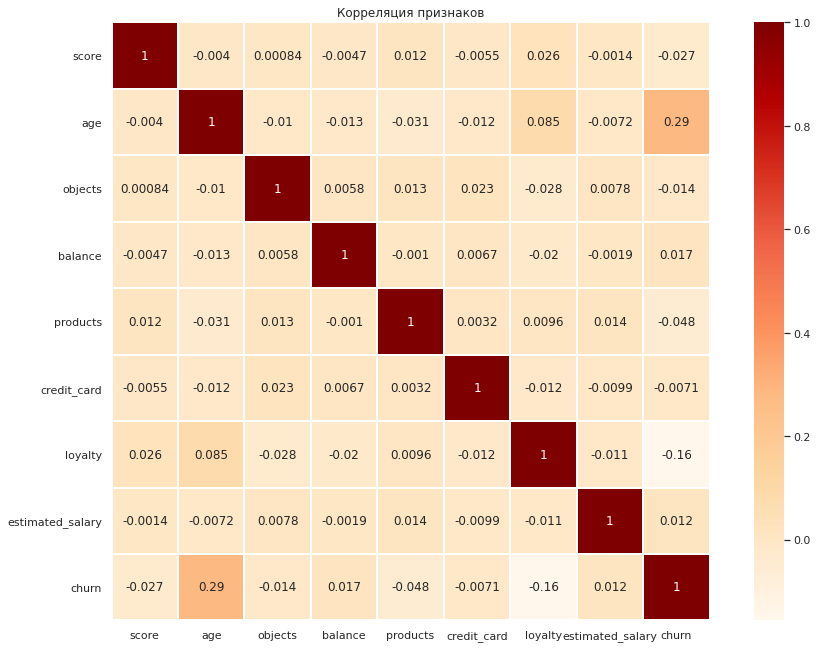

In [18]:
# Построим матрицу корреляций и отобразим её.
df = data.drop(['user_id'], axis=1).corr() 

sns.set(style='white')
plt.figure(figsize=(16, 11))
plt.title('Корреляция признаков')
sns.heatmap(df, annot = True, square=True,linewidths=1,cmap="OrRd" )
plt.show()

Ни один из признаков не перешёл порог явной корреляции 0,3. Из общей картины выделяется только признак по возрасту и оттока. 

## 3. Сегментируем пользователей на основе данных о количестве потребляемых продуктов

Далее разделим данные по количеству используемых продуктов, в описании назовём их группа 1, 2,3 и 4. 

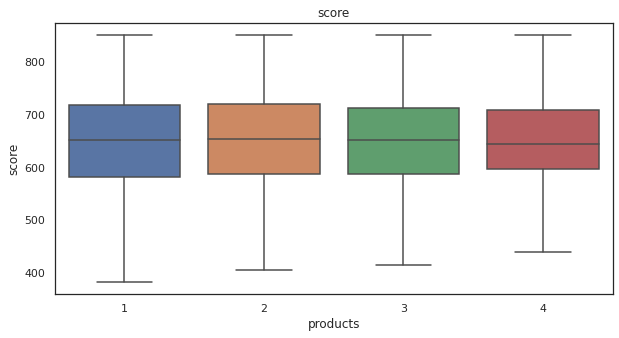

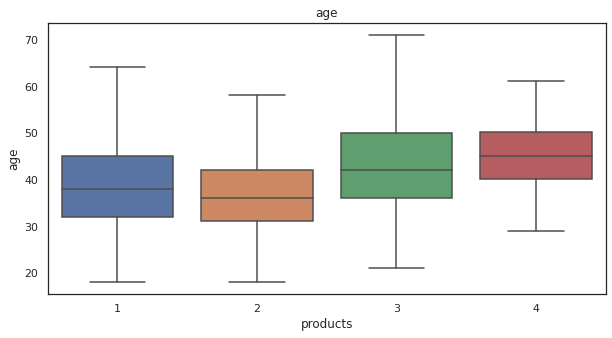

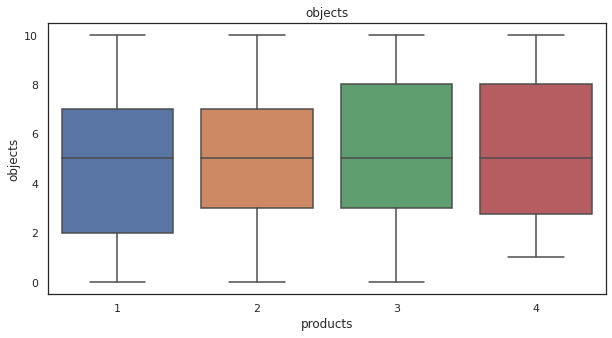

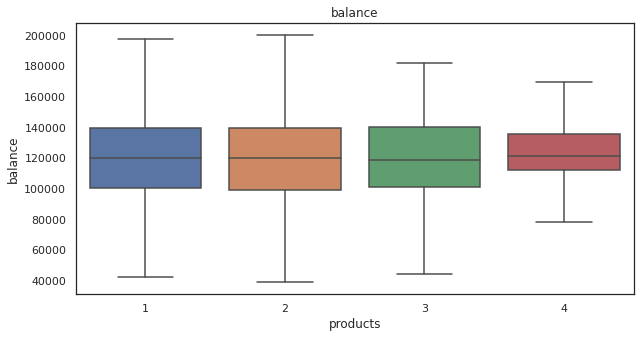

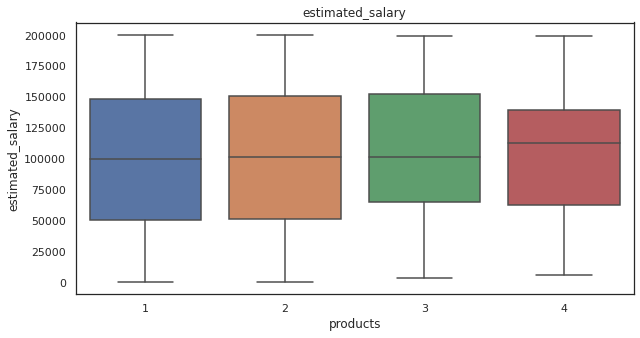

In [19]:
for i in ['score', 'age', 'objects', 'balance','estimated_salary']:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='products',y=i, data=data,showfliers=False).set_title(i)
    plt.show() 

Описание количественных данных в разрезе по признаку «products»:  
Межквартильный размах и медиана у всех групп не имеет больших различий. Ширина диапазона позволяет нам судить о  разнообразие показателей в данных, но это не позволяет выделить явных лидеров по группам. 


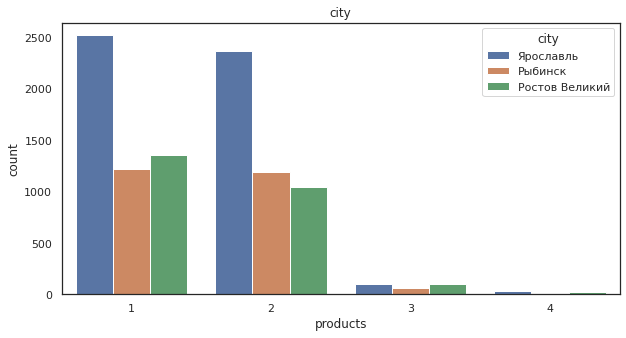

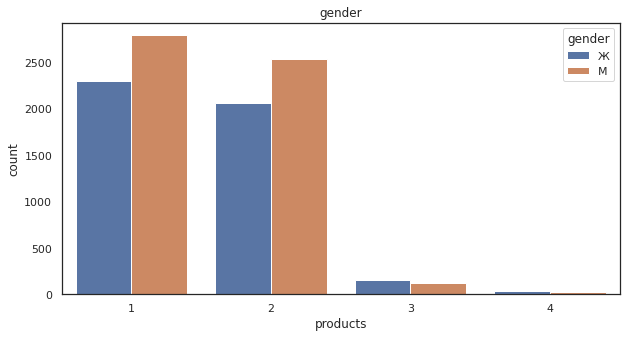

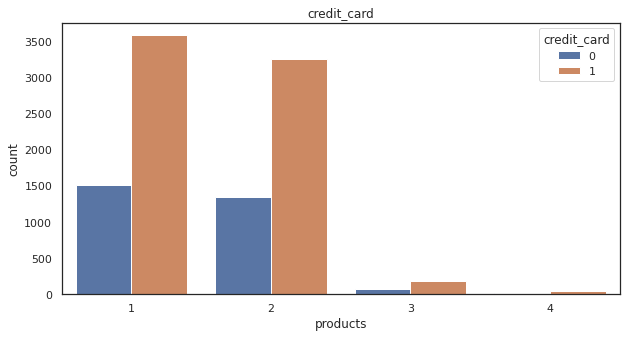

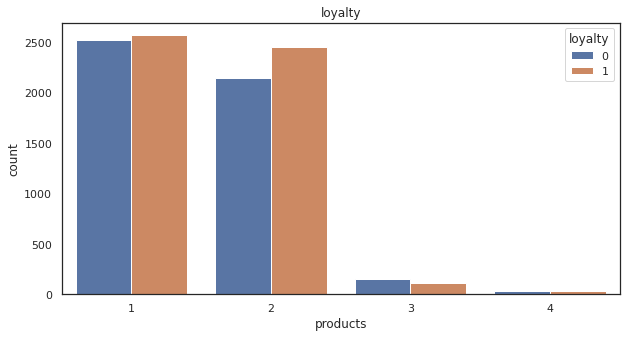

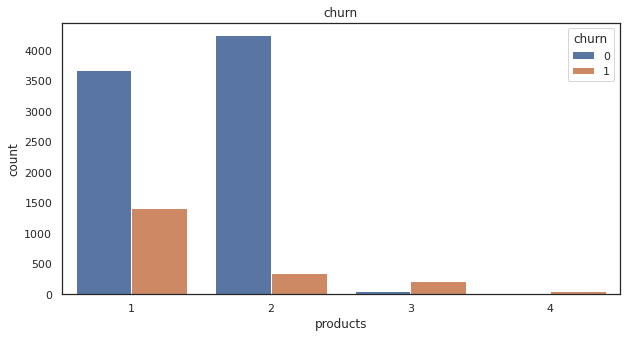

In [20]:
for i in ['city', 'gender', 'credit_card', 'loyalty', 'churn']:
    plt.figure(figsize=(10,5))
    sns.countplot(x='products', hue=i, data=data).set_title(i)
    
    plt.show()
    

Опишем графики цифрами

In [21]:
pivot_credit = data.pivot_table(index= ['products'], columns= 'credit_card',values='loyalty',aggfunc='count')
pivot_credit

credit_card,0,1
products,,
1,1506,3578
2,1344,3246
3,76,190
4,19,41


In [22]:
pivot_city = data.pivot_table(index= ['products'], columns= 'city',values='loyalty',aggfunc='count')
pivot_city

city,Ростов Великий,Рыбинск,Ярославль
products,,,
1,1349,1221,2514
2,1040,1183,2367
3,96,66,104
4,24,7,29


In [23]:
pivot_gender = data.pivot_table(index= ['products'], columns = 'gender',values='loyalty',aggfunc='count')
pivot_gender

gender,Ж,М
products,,
1,2296,2788
2,2060,2530
3,149,117
4,38,22


In [24]:
pivot_loyalty = data.pivot_table(index= ['products'], columns = 'loyalty',values='churn',aggfunc='count')
pivot_loyalty

loyalty,0,1
products,,
1,2521,2563
2,2144,2446
3,153,113
4,31,29


In [25]:
pivot_churn = data.pivot_table(index= ['products'], columns = 'churn',values='loyalty',aggfunc='count')
pivot_churn['% оттока'] = pivot_churn[1]/(pivot_churn[1] + pivot_churn[0]) * 100
pivot_churn

churn,0,1,% оттока
products,,,
1,3675.0,1409.0,27.714398
2,4242.0,348.0,7.581699
3,46.0,220.0,82.706767
4,NaN,60.0,NaN


Описание дискретных и категориальных данных в разрезе по признаку «products»:  

Из графиков мы видим, что 1 и 2 группа самые информативные. Поэтому считаю целесообразно добавить описание толь по этим двум группам   
1 группа:  
Большая часть клиентов из Ярославля, в Рыбинске и Ростове на половину меньше.  
Мужчин не намного больше, чем женщин  
Больше половины являются держателями кредитных карт  
Количество лояльных и не лояльных клиентов почти одинакова  
Отток 27,7%

2 Группа:    
Большая часть клиентов из Ярославля, в Рыбинске и Ростове на половину меньше.  
Мужчин не намного больше, чем женщин  
Больше половины являются держателями кредитных карт  
Количество лояльных клиентов больше  
Отток 7,6%


## 4. Гипотезы.

### Проверим первую гипотезу о различиях в доходах между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

H0: между группами есть статистически значимое различие в доходах   
H1: между клиентами первой и второй группой нет статистически значимого различия в доходах

In [26]:
alpha = 0.05  

results = sps.mannwhitneyu(products_1,products_2)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: ЕСТЬ статистически значимое различие в доходах ')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу:  НЕТ статистически значимого различия в доходах '
    ) 

NameError: name 'products_1' is not defined

Результат проверки первой гипотезы показал нам, что доходы лояльных клиентов в группах оттока и оставшихся статистически значимых различий НЕ имеет. 

### Проверим

In [ ]:
products_1 = data.query('products == 1')['estimated_salary']
products_2 = data.query('products == 2')['estimated_salary']

In [ ]:
plt.figure(figsize=(15, 10))  
sns.distplot(products_1,bins=50)
sns.distplot(products_2,bins=50)
plt.legend(['1продукт', '2продукта'])
plt.title('Зарплаты клиентов')
plt.xlabel("Зарплата") 
plt.ylabel("Частота"); 

In [ ]:
print('Среднее доходов 1 группы: {}'.format(round(products_1.mean(),2)))
print('Среднее доходов 2 группы: {}'.format(round(products_2.mean(),2)))      

### 2 Гипотеза

### Сформулируем и проверим вторую статистическую гипотезу относительно представленных данных.

Н0: В группах оттока доли лояльных и не лояльных клиентов одинаковы   
Н1: В группах оттока доли лояльных и не лояльных клиентов различаются 

In [ ]:
def z_test(a, i, alpha):

    group = data[a].value_counts() 
    churn_size = data.groupby(i)[a].sum() 
 

    p = churn_size / group
    p_combined = churn_size.sum() / group.sum()
    
    # разница пропорций в датасетах
    difference = p[0] - p[1]
 
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/group[0] + 1/group[1]))
 
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = sps.norm (0,1 ) 
 
    p_value = (1 - distr.cdf(abs(z_value))) * 2
 
    print('Уровень значимости:{}'.format(alpha))
    print('p-значение: {0:.15f}'.format(p_value))

    if (p_value < alpha):    
        print('Отвергаем нулевую гипотезу: статистически значимое различие в долях ЕСТЬ')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в долях НЕТ ')
z_test('churn', 'loyalty', .05)

### Проверим

In [ ]:
churn_0 = data.query('churn == 0')['loyalty'] #оставшиеся
churn_1 = data.query('churn == 1')['loyalty'] #отток

In [ ]:
plt.figure(figsize=(15, 10))  
sns.distplot(churn_0,bins=50)
sns.distplot(churn_1,bins=50)
plt.legend(['Отток', 'Остались'])
plt.title('Лояльность клиентов ')
plt.xlabel('Лояльность') 
plt.ylabel('Частота');

В результате проверки второй гипотезы мы выяснили, что разница в доли лояльных и не лояльных клиентов, в группах оттока и оставшихся имеет статистически значимые различия.

## Вывод:

Мы провели сегментацию клиентов банка разделяя их по количеству продуктов. Выяснилось, что большинство наших клиентов используют 1 или 2 продукта. Но во второй группе наименьший процент оттока 7,6%. Клиент второй группы примерно выглядит так:  
- мужчина  
- 37 лет  
- со средней зарплатой 100 т.р.
- держатель кредитной карты
- входящий в список лояльных 
- проживающий в Ярославле.  



На каких клиентов нам стоит обратить внимание и подготовить выгодные предложения для сотрудничества:  
- жители города Ростов Великий и Рыбинск, эти города требуют расширения во всех сферах деятельности нашего банка  
- клиенты старше 45 лет. Здесь нужно провести дополнительное исследование по видам услуг банка. Возможно, стоит пересмотреть возрастные ограничения по условиям. Добавить программы для людей предпенсионного и пенсионного возраста.  
- оставшиеся не лояльные клиенты. Здесь стоит организовать программу(акцию) для перетягивания не лояльных клиентов в лояльные. 


Дашборт: https://public.tableau.com/app/profile/evgeniya4304/viz/_16673939961940/Dashboard1?publish=yes

Презентация: https://disk.yandex.ru/d/DRtER-etB3d8ZA
